In [3]:
import IPython
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt

<img src="https://avatars3.githubusercontent.com/u/7388996?v=3&s=200" alt="Drawing" align="left" style="width: 120px;"/>

# Introduction to Jupyter

[Jupyter](http://jupyter-notebook.readthedocs.io/en/latest/notebook.html) (previously known as IPython Notebook) is an application that facilitates the development, execution, and presentation of Python code, all in one interface.
Jupyter also supports text, [$\LaTeX$](https://www.latex-project.org), hyperlinks, images, sound files, and more.

## Cells

A Jupyter notebook consists of seperate sections called _cells_.
There are two main types of cells:
- _Markdown cells_ (like this cell) containing text, $\LaTeX$, or images.
- _Code cells_ containing Python code that can be executed within the notebook.

Each code cell can be run independent of other cells, as if the code from that cell were being pasted into IPython and executed line by line.
When a cell is run, its output will be displayed directly after it.
Run the following code cell by clicking on it, holding `Ctrl` or `Shift`, and pressing `Enter`.
You can also click the run button (the "play" button) on the tool bar at the top of the page.

In [1]:
def factorial(n):
    """Calculate n! recursively."""
    if n < 0:
        raise ValueError("n! not defined for n < 0")
    elif n in {0, 1}:   # Base case.
        return 1
    else:               # Recursive case.
        return n * factorial(n - 1)

    
# print() displays text below the code cell.
print("3! =", factorial(3))
print("5! =", factorial(5))

# The result of the line of code at the end of the cell is displayed below the cell as output, like in IPython.
factorial(10)

3! = 6
5! = 120


3628800

The blue `In [1]` to the left of the cell indicates that the cell has been run, with output labeled by the red `Out[1]`.
Once a cell has been run, all of the variables, functions, and other objects that were created in that cell are available in all other cells.
For example, the following cell has access to the `factorial()` function once the previous cell has been run.

In [2]:
print("7! =", factorial(4))

x = 50

7! = 24


Note that the above cell has no output (no `Out[2]` printed after the cell in red).
This is because the last line of code, `x = 50`, does not return anything.
If the cell instead ended with the code
```python
x = 50

x
```
Then the output would be 50.

Now run the next cell.

In [4]:
x = x * 2

x

200

The output should now be $100$.

Try running the previous cell again.
Now it outputs $200$; the value of `x` has been updated, even though the first time `x` was doubled by running the same cell.
In other words, **running a single cell twice executes the code in the cell twice**.

⚠️ <span style="color:red"><strong>ACHTUNG!</strong></span> Since code cells can be run multiple times (and in any order), it is very important to be aware of which cells have been run and when.
Notebooks should be organized so that in the end, the cells can be executed sequentially without any problems.
Some very hard-to-find problems can arise from executing cells multiple times or out of order.

Cells that are in the process of running, or that are waiting for another cell to finish before running, have `In [*]` displayed beside them.
For example, run the following cell.

In [5]:
while True:
    x += 1

KeyboardInterrupt: 

At this point, Python is stuck in an infinite loop.
To interrupt the loop, press the square "stop" button in the menu bar, or choose "Interrupt" from the **Kernel** menu.
This is equivalent to pressing `ctrl+c` in the terminal while some code is running.

Now run the cell below to see how much `x` has increased during the loop.

In [1]:
x

NameError: name 'x' is not defined

### The Kernel

The Python interpreter that runs notebook code under the hood is called the _kernel_.
The **Kernel** menu at the top of the page has the following options.
- **Interrupt**: stop executing code by raising a `KeyboardInterrupt`. Same as hitting the "stop" button in the toolbar.
- **Restart**: stop execution and **delete all variables**. Every cell label goes back to `In [ ]`, meaning none of the cells have been run yet. This is like exiting IPython, then starting it again. Same as hitting the "restart" button in the toolbar.
- **Restart & Clear Output**: restart the kernel and delete all outputs (`Out[1]`, figures, etc.).
- **Restart & Run All**: restart the kernel, then run each code cell sequentially.

Try restarting the kernel by selecting **Restart** from the **Kernel** menu, or by pressing the "restart" button in the toolbar.
Next, run the code cell immediately above this cell.
The cell now raises an error, since restarting the kernel erased the variable `x`.

⚠️ <span style="color:red"><strong>ACHTUNG!</strong></span> Restart the kernel often to avoid using old code that was executed at one point, but was later deleted or overwritten.
Then execute cells from top to bottom until you get back to where you were working.

### Managing Cells

Running a cell with `Shift` and `Enter` moves to the next cell.
If there is no next cell, a new one is created.
To make new cells in the middle of a notebook, use the **Insert** menu at the top of the page or the **+** button in the toolbar.
The type of a cell (usually **markdown** or **code**) can be changed in the toolbar.
Try making a code cell below this markdown cell and executing some original code.

Jupyter also has many shortcuts for quick cell creation and management.
Select **Keyboard Shortcuts** from the **Help** menu for the full list.
Try the **User Interface Tour** from the **Help** menu to learn about additional features.

## Images, Sounds, and Text Inline

### Images

By default, matplotlib generates images in a pop-up window whenever `plt.show()` is called.
Jupyter, on the other hand, displays static graphs as an output of the code.

Creating plots in Python usually requires importing modules such as `numpy` and `matplotlib`.
In Jupyter it is customary to put all import statements in a single cell at the top of the notebook, like in this notebook.

Run the following cell to create a plot inline.
If there is a `NameError` saying that the name `np` is not defined, run the very first cell of this notebook.

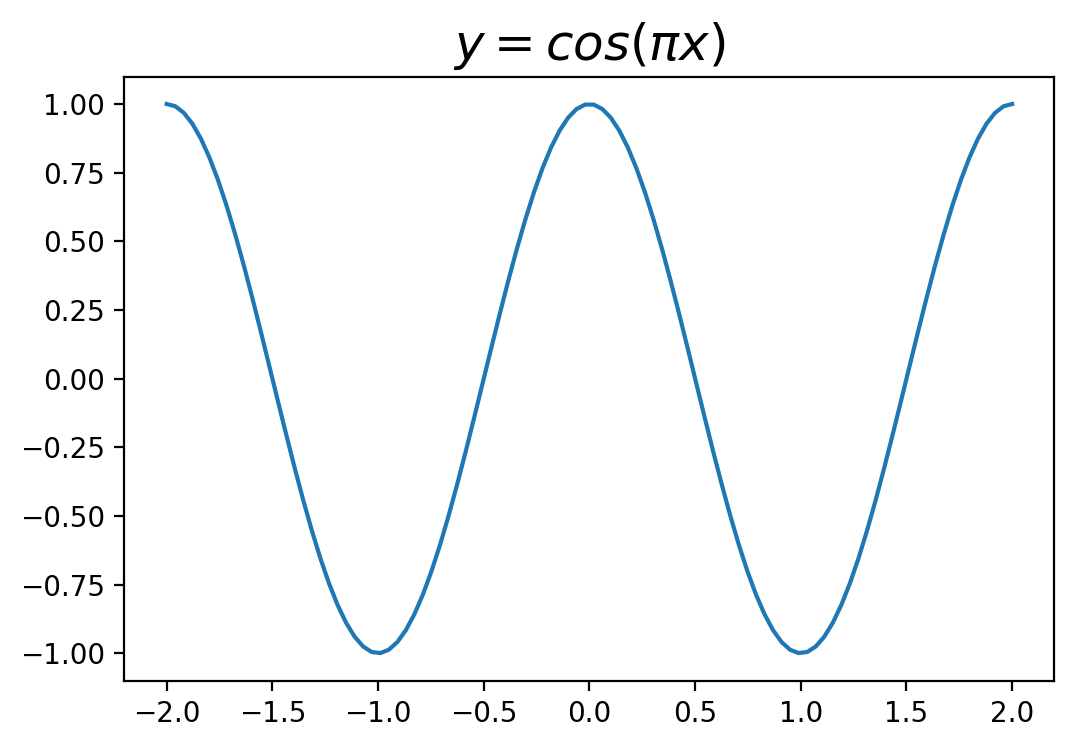

In [9]:
# Graph y = cos(pi*x) for x in [-2, 2].

x = np.linspace(-2,2,100)
plt.plot(x, np.cos(x*np.pi))
plt.title(r"$y = cos(\pi x)$", fontsize=18)
plt.show()     # plt.show() isn't necessary but it doesn't mess anything up.

Matplotlib plots can be made interactive in Jupyter by running the following command:

In [5]:
%matplotlib notebook

Try re-running the cell that created the plot.
Now the figure supports zooming, panning, being saved to the file system, and so on.
The following command sets the notebook back to the default behavior of displaying static images.

In [7]:
%matplotlib inline

The following matplotlib customization improves the presentation of inline figures in the default static mode.

In [8]:
plt.rcParams["figure.dpi"] = 200

### Sound Files

Jupyter can also embed sound clips in a notebook.
Start by saving a sound file in the same place as the notebook, then import the `IPython` module and use `IPython.display.Audio()` with the name of the sound file as input.

As an example, the following cell creates a short sound file called `example.wav`.
Then next cell embeds the sound into the notebook by creating an interactive audio bar that is connected to the sound file.

In [ ]:
# Create example.wav, a simple sound file.
wavfile.write("example.wav", 44100, np.int16(32767 * np.sin(1000*np.pi*np.linspace(0, 10, 441000))))

In [ ]:
# Embed example.wav into the notebook. Turn the volume down before pressing play!
IPython.display.Audio("example.wav")

### Text

_Markdown_ is a barebones text formatting language that allows for standard formatting like headings, italics, lists, hyperlinks, and so on.
In Jupyter, markdown cells are "run" in the same way as code cells: hold `shift` or `ctrl` and press `enter`, or hit the "run" button in the toolbar.
To edit a markdown cell, double click on it (double click on this cell, for example).

#### Markdown Syntax

- **Headings**: Type from one to six `#`'s at the beginning of a line followed by a space and the heading text. The more `#`'s, the smaller the heading.
- __Italics__: Surround text with one \_ or one \* on each side.
- **Bold**: Surround text with two \_ or two \* on each side.
- **Hyperlinks**: Surround the link text with hard brackets, followed by the URL in parentheses. For example, [this link](https://guides.github.com/features/mastering-markdown/).
- **Lists**: Start consecutive lines with a \* or a \- for each point in an unordered list, or with 1. 2. 3. ... in an ordered list.
- **Code**: Surround text with one \` on each side. For code blocks, start and end with three \`, followed (optionally) by the name of the language. For example,
```python
world = None
def make_world():
    return "Hello, world!"
world = make_world()
print(world)
```

#### LaTeX

To embed $\LaTeX$ formatting in a Jupyter markdown cell, surround the command with either `$` or `$$` on each side.
The single dollar sign puts it inline with the text (like this: $y = x^2 - 1$), and the double dollar sign centers it below the text, like the following line. $$F_X(x) = \int_{-\infty}^{\infty} f_X(x) dx$$
⚠️ <span style="color:red"><strong>ACHTUNG!</strong></span> Embedding $\LaTeX$ is a feature of Jupyter, not of markdown in general.

See [this page](https://guides.github.com/features/mastering-markdown/) for more markdown syntax and examples.

## Interactive Python

All of the interactive features of IPython are available in Jupyter notebook, including object introspection and tab completion.

To view the docstring for a function, module, or other object, type the name of the object followed by a question mark, and run the cell.
A resizable help panel will appear at the bottom of the screen with the documentation.

In [11]:
# View the docstring about the dictionary data structure
dict?

You can also view the attributes and methods of an object by pressing `tab` after typing a period after an object. 
Similarly, you can view what arguments a function takes by holding `shift` and pressing `tab` while the cursor is inside the paretheses of the function.

In [ ]:
# Press tab while the cursor is at the end of the next line to view the methods of the list class.
list.

# Press shift + tab while the cursor is inside the parentheses to view argument types of list.insert().
list.insert()

IPython "magic" operations also carry over to Jupyter.
Use a single `%` to perform a magic operation on a single line, or use two `%` to perform the operation on an entire cell.
The following are some of the most common and useful magics.
- `%lsmagic`: List all available magics.
- `%time`: Time the execution of some code.
- `%timeit`: Execute some code several times and report the average execution time.
- `%prun`: Run some code through the Python code profiler, printing the number of function calls and the time each takes (see the _Python Essentials_ lab on Profiling for details).
- `%%bash`: Run a cell with bash (as if from a terminal) in a new subprocess. Putting `!` at the front of a line also triggers bash.
- `%%latex`: Render a cell as a block of LaTeX.

In [ ]:
# Time how long it takes to sum the integers from 1 to 100.
# Note that the sum is the cell output.
%time sum(range(101))

In [ ]:
# Time how long it takes to sum the squares of the integers from 1 to 100.
# Note that the sum is not reported as the cell output.
%timeit sum(i**2 for i in range(101))

In [ ]:
%%time
# Time the execution of an entire cell.
N = 1000000
current, total = 2, 0
while current < N:
    total += current
    current *= 2
print("Sum of powers of 2 less than ", N, ": ", total, sep='', end='\n\n')

In [ ]:
%%bash
# This is bash, not Python.
for i in {1..3}; do
    echo $i "ah ah ah!"
done

In [ ]:
%%latex
Let $A$ be an $m \times n$ matrix with columns $\{\mathbf{a}_j\}_{j=1}^n$ and entries $a_{ij}$.
If $\textbf{x}$ is a vector with entries $\{x_j\}_{j=1}^n$, then the product
$A\mathbf{x}$ is a vector $\mathbf{b}$ with entries $\{b_i\}_{i=1}^m$ satisfying
$$b_i = \sum_{j=1}^n x_j a_{ij}$$
for each $i=1,2,\ldots,m$. Furthermore,
$$\mathbf{b} = \sum_{j=1}^n x_j\mathbf{a}_j.$$

## The Notebook as a Slideshow


Jupyter notebooks can be converted to simple slideshows.
To get started, go to "Cell Toolbar" under the **View** menu and select "Slideshow" (select "None" to go back to normal).
Each cell in the notebook can then be configured as one of the several kinds of slides.
After selecting cell types and saving the notebook, use the following commmand in the terminal.
```bash
jupyter nbconvert [notebook_file.ipynb] --to slides --post serve
```
The slideshow will appear in the default browser and a file named `[notebook_file].slides.html` will be saved to the current directory.

In [ ]:
# Run this cell to see this notebook as a slideshow.
!jupyter nbconvert jupyter_intro.ipynb --to slides --post serve
# Interrupt the kernel with ctrl+c to move on.

[NbConvertApp] Converting notebook jupyter_intro.ipynb to slides
[NbConvertApp] Writing 388346 bytes to jupyter_intro.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/jupyter_intro.slides.html
Use Control-C to stop this server


## Closing Jupyter

Closing the browser containing a Jupyter notebook neither closes the Jupyter Notebook App nor shuts down the kernel. Instead, close the terminal that started Jupyter, or interrupt it by typing `ctrl+c`.

## Additional Resources

- The official Jupyter Notebook docs: http://jupyter-notebook.readthedocs.io/en/stable/
- A collection of interesting Jupyter Notebooks on GitHub: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
- Plotly's tutorial for interactive plots in a Notebook: https://plot.ly/python/ipython-notebook-tutorial/
- Project Jupyter home: http://jupyter.org
- A blog on [JupyterLab](https://blog.jupyter.org/jupyterlab-the-next-generation-of-the-jupyter-notebook-5c949dabea3), the future of Jupyter notebook.
